In [1]:
from sklearn.datasets import make_circles
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import SGD
from matplotlib import pyplot
from numpy import where

Using TensorFlow backend.


In [2]:
# generate 2d classification dataset
X, Y = make_circles(n_samples=1000, noise=0.1, random_state=1)
# change Y from {0,1} to {-1,1}
Y[where(Y == 0)] = -1

In [3]:
Y

array([ 1,  1, -1, -1, -1,  1, -1,  1, -1, -1, -1, -1,  1, -1,  1, -1, -1,
       -1,  1, -1,  1, -1,  1,  1, -1, -1, -1,  1,  1, -1,  1,  1,  1, -1,
       -1, -1, -1,  1,  1,  1,  1,  1, -1, -1, -1,  1,  1, -1, -1,  1,  1,
       -1,  1, -1, -1, -1,  1,  1, -1,  1, -1, -1, -1,  1,  1,  1, -1,  1,
        1, -1,  1, -1, -1,  1, -1, -1, -1,  1, -1,  1, -1,  1,  1,  1,  1,
        1, -1,  1,  1,  1,  1, -1,  1,  1, -1,  1,  1,  1, -1, -1, -1, -1,
        1, -1, -1,  1, -1,  1, -1,  1, -1,  1,  1, -1,  1, -1,  1, -1, -1,
        1, -1, -1, -1, -1, -1,  1,  1,  1,  1,  1,  1, -1,  1, -1,  1,  1,
        1,  1, -1,  1, -1, -1,  1,  1, -1,  1,  1,  1,  1,  1, -1,  1, -1,
        1, -1,  1,  1,  1, -1, -1, -1, -1, -1,  1,  1, -1, -1,  1,  1, -1,
       -1, -1, -1, -1,  1, -1, -1,  1,  1,  1, -1, -1,  1,  1,  1, -1, -1,
       -1,  1,  1,  1,  1, -1,  1,  1, -1,  1,  1,  1, -1, -1,  1,  1, -1,
        1,  1, -1, -1, -1,  1,  1, -1,  1, -1,  1, -1, -1, -1,  1, -1, -1,
        1, -1,  1,  1,  1

In [4]:
# split into train and test
n_train = 500
trainX, testX = X[:n_train, :], X[n_train:, :]
trainY, testY = Y[:n_train], Y[n_train:]

In [5]:
# define model
model = Sequential()
model.add(Dense(50, input_dim=2, activation='relu', kernel_initializer='he_uniform'))
model.add(Dense(1, activation='tanh'))
opt = SGD(lr=0.01, momentum=0.9)
model.compile(loss='squared_hinge', optimizer=opt, metrics=['accuracy'])

W1215 15:45:19.018522 11136 deprecation_wrapper.py:119] From C:\Users\Lenovo\Anaconda3\lib\site-packages\keras\backend\tensorflow_backend.py:74: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W1215 15:45:19.048176 11136 deprecation_wrapper.py:119] From C:\Users\Lenovo\Anaconda3\lib\site-packages\keras\backend\tensorflow_backend.py:529: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W1215 15:45:19.050147 11136 deprecation_wrapper.py:119] From C:\Users\Lenovo\Anaconda3\lib\site-packages\keras\backend\tensorflow_backend.py:4420: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.

W1215 15:45:19.139542 11136 deprecation_wrapper.py:119] From C:\Users\Lenovo\Anaconda3\lib\site-packages\keras\optimizers.py:793: The name tf.train.Optimizer is deprecated. Please use tf.compat.v1.train.Optimizer instead.



In [6]:
# fit model
history = model.fit(trainX, trainY, validation_data=(testX, testY), epochs=200, verbose=0)

W1215 15:45:19.375160 11136 deprecation.py:323] From C:\Users\Lenovo\Anaconda3\lib\site-packages\tensorflow\python\ops\math_grad.py:1250: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
W1215 15:45:19.424692 11136 deprecation_wrapper.py:119] From C:\Users\Lenovo\Anaconda3\lib\site-packages\keras\backend\tensorflow_backend.py:1021: The name tf.assign_add is deprecated. Please use tf.compat.v1.assign_add instead.

W1215 15:45:19.465415 11136 deprecation_wrapper.py:119] From C:\Users\Lenovo\Anaconda3\lib\site-packages\keras\backend\tensorflow_backend.py:1008: The name tf.assign is deprecated. Please use tf.compat.v1.assign instead.



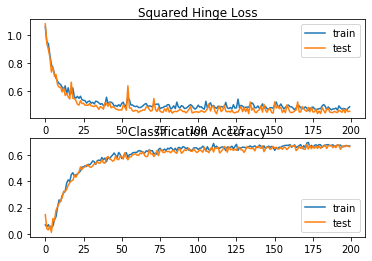

In [7]:
_, train_acc = model.evaluate(trainX, trainY, verbose=0)
_, test_acc = model.evaluate(testX, testY, verbose=0)

# plot loss during training
pyplot.subplot(211)
pyplot.title('Squared Hinge Loss', pad=-20)
pyplot.plot(history.history['loss'], label='train')
pyplot.plot(history.history['val_loss'], label='test')
pyplot.legend()

# plot accuracy during training
pyplot.subplot(212)
pyplot.title('Classification Accuracy', pad=-40)
pyplot.plot(history.history['acc'], label='train')
pyplot.plot(history.history['val_acc'], label='test')
pyplot.legend()
pyplot.show()